## Problem 1

a)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # for reproducibility

n_simulations = 10000  # the number of simulations to run
n_minutes = [1,10,60,44640]  # the time we're interested in
initial_price = 100  # initial stock price

def monte_carlo(initial_price,n_minutes,n_simulations):
    # each step is either +1 or -1
    steps = np.random.choice([-1, 1], size=(n_simulations, n_minutes))

    # cumulative sum along the row axis
    paths = np.cumsum(steps, axis=1)

    # Add the initial price to the paths
    paths += initial_price
    # calculate the expected (mean) final price
    expected_final_price = paths[:, -1].mean()

    return expected_final_price
   
    # steps
for n_minute in n_minutes:
    expected_final_price = monte_carlo(initial_price,n_minute,n_simulations)
    print(f"The expected value of the stock price after {n_minute} minutes is: {expected_final_price}")


The expected value of the stock price after 1 minutes is: 100.017
The expected value of the stock price after 10 minutes is: 99.982
The expected value of the stock price after 60 minutes is: 99.986
The expected value of the stock price after 44640 minutes is: 104.2124


The values are not the same, because these paths are all generated randomly. Monte Carlo simulations produce different values because they use randomness as a key part of the process.

The fundamental concept of a Monte Carlo simulation is to model a complex system by generating random numbers and observing the resulting behavior of the system. It's a type of computational algorithm that relies on repeated random sampling to obtain numerical results. The randomness comes from the inherent uncertainty and variability in the system.

This is why multiple runs of the same Monte Carlo simulation will often produce different results. It's also why Monte Carlo simulations are often run many times (e.g., thousands or millions of times), to obtain a distribution of possible outcomes and better understand the range and likelihood of different scenarios.

b) i)
The probability that the walk ever hits +a before hitting -b is (b/(a+b)) if a and b are positive. This is under the assumption that the walk starts at 0.

In the symmetric random walk, time and position are interchangeable in some sense. In particular, the distribution of the position at a fixed time and the distribution of the time it takes to get to a fixed position have the same shape.

In this case, the walk starts at $100 and the question is about the probabilities of hitting $102 (+2 steps) or $96 (-4 steps) first. Therefore, we can think of this as a walk that starts at 0 and asks about hitting +2 before -4.

From point 1, the probability is given by:

P = -4 / (-4 + 2) = 2 / 3 ~= 0.67

So, the probability that the stock hits $102 before hitting $96 is 2/3, or approximately 0.67, 

The Monte Carlo estimate of the probability is: 0.66409


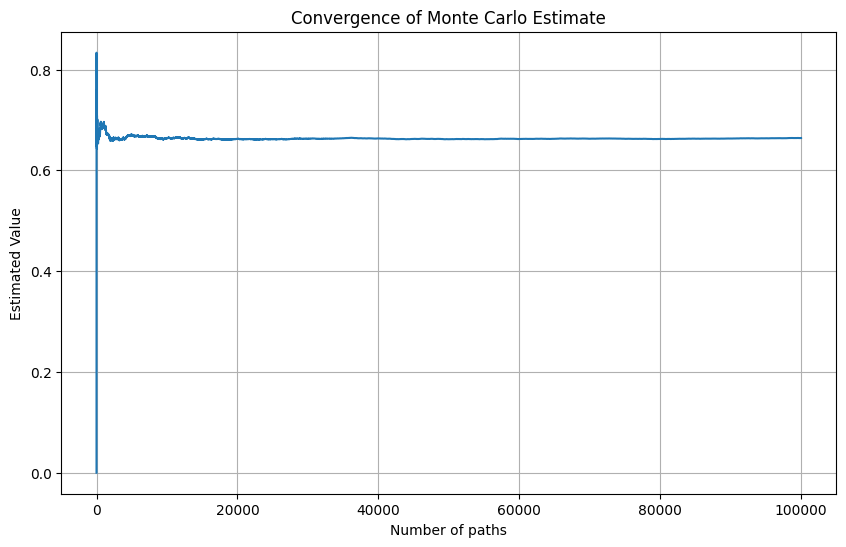

In [4]:
# ii)
initial_price = 100
lower_bound = 96
upper_bound = 102
n_steps = 1000
n_simulations = 100000

# To store results
results = np.zeros(n_simulations)
estimated_values = []

# Simulation
for i in range(n_simulations):
    price = initial_price
    for _ in range(n_steps):
        price += np.random.choice([-1, 1])
        if price == upper_bound:
            results[i] = 1
            break
        elif price == lower_bound:
            break
    
    # Compute and store current estimated value
    estimated_value = results[:i+1].mean()
    estimated_values.append(estimated_value)

print(f"The Monte Carlo estimate of the probability is: {estimated_value}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(estimated_values)
plt.xlabel('Number of paths')
plt.ylabel('Estimated Value')
plt.title('Convergence of Monte Carlo Estimate')
plt.grid(True)
plt.show()

## Problem 2

In [5]:
from scipy.stats import norm
def black_scholes_call(S, K, T, r, sigma):
    """
    Calculates the price of a European call option using the Black-Scholes formula.

    Parameters:
    S: The current price of the underlying asset.
    K: The strike price of the option.
    T: The time to maturity of the option, in years.
    r: The risk-free interest rate, expressed as a decimal. (For example, 5% is expressed as 0.05.)
    sigma: The volatility of the underlying asset, expressed as a decimal.

    Returns:
    The price of the option, according to the Black-Scholes formula.
    """
    # Calculate d1 and d2 parameters
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate and return the price of the option
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

(S, K, r, q,T, sigma)=(200,180,0.02,0,1/12,0.15)
partd_answer = black_scholes_call(S, K, T, r, sigma)
print("Using the BS model the option price for european option is ",partd_answer.round(4))
# print("the part a answer is",parta_answer.round(4))

Using the BS model the option price for european option is  20.3177


## Problem 3

Monte Carlo European Put price: 19.9645


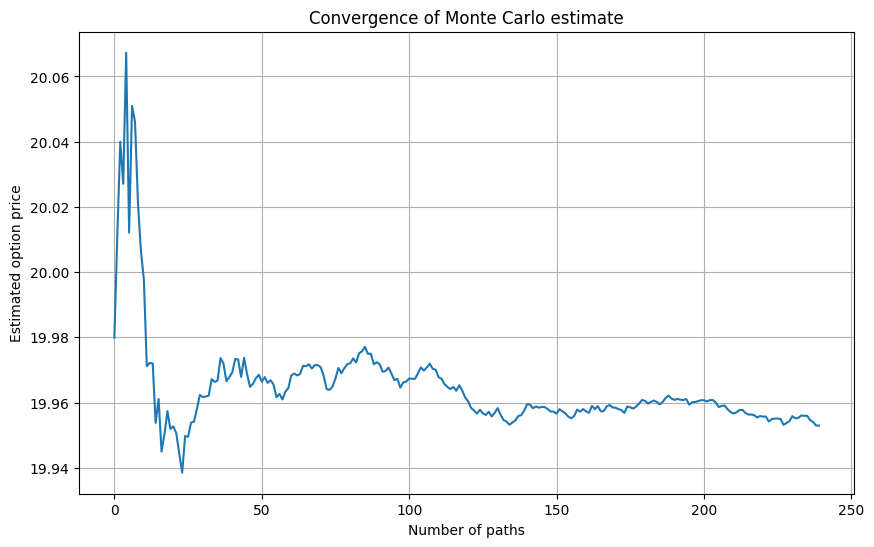

In [32]:
n_simulations = 10000  # the number of simulations to run
n_minutes = 240
def monte_carlo_call_price(S, K, T, r, sigma, n_simulations,n_minutes):
    """
    Calculates the price of a European call option using Monte Carlo simulations.

    Parameters:
    S: The current price of the underlying asset.
    K: The strike price of the option.
    T: The time to maturity of the option, in years.
    r: The risk-free interest rate, expressed as a decimal. (For example, 5% is expressed as 0.05.)
    sigma: The volatility of the underlying asset, expressed as a decimal.
    n_simulations: The number of simulations to run.

    Returns:
    The estimated price of the option.
    """
    # Generate potential future asset prices

    dT=T/n_minutes
    Z = np.random.standard_normal(n_simulations)
    S_T = S * np.exp((r - 0.5 * sigma**2) * dT + sigma * np.sqrt(dT) * Z)

    # Calculate the payoffs for these potential future asset prices
    payoffs = np.maximum(S_T - K, 0)

    # Calculate and return the discounted expected payoff
    call_price = np.exp(-r * T) * payoffs
    prices = [np.mean(call_price[:i+1]) for i in range(n_simulations)]
    return prices

# Parameters from part (a)

num_simulations = 240
monte_carlo_prices = monte_carlo_call_price(S, K, r, sigma, T, num_simulations,n_minutes)

print("Monte Carlo European Put price:", np.mean(monte_carlo_prices).round(4))

plt.figure(figsize=(10, 6))
plt.plot(monte_carlo_prices)
plt.xlabel('Number of paths')
plt.ylabel('Estimated option price')
plt.title('Convergence of Monte Carlo estimate')
plt.grid(True)
plt.show()